In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [106]:
import warnings
warnings.filterwarnings("ignore")

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [78]:
ground_cricket_data = {"Chirps/second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [79]:
df.head()

,Chirps/second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [80]:
x = df['Ground Temperature']
x = x.to_frame()
y = df['Chirps/second']

**The linear regression equation for this data**

In [81]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)

LinearRegression()

In [82]:
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 0.45931464523595267
coefficient: [0.20299973]


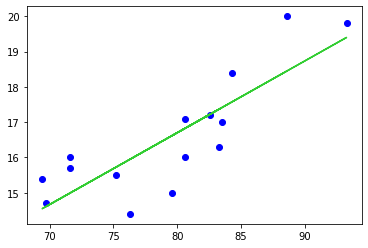

In [83]:
plt.scatter(x, y, color='blue')
plt.plot(x, linreg.predict(x), color='limegreen')

**the equation's  R2  score**

In [84]:
print('r-squared: ', linreg.score(x, y))

r-squared:  0.6922946529146998


**At 95˚F, our approximation of chirps/sec** 

In [107]:
Y_pred = linreg.predict(np.array([95]).reshape(1, 1))

In [105]:
 Y_pred

array([182.82155114])

**chirping at a rate of 18 chirps per second**

In [87]:
(18 - linreg.intercept_) / linreg.coef_ 


array([86.40743135])

**With an observation of 18 chirps/sec, we expect a ground temp of 86.41˚F**

# Assignment 6

# Brain vs. Body Weight

Brain vs. Body Weight
In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

Task

*  Find the linear regression equation for this data for brain weight to body weight.
*   Chart the original data and the equation on the chart.

*   Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)






In [88]:
df = pd.read_fwf("/content/drive/MyDrive/brain_body .txt")

In [89]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [90]:
x = df['Brain']
x = x.to_frame()
y = df['Body']

**the linear regression equation for this data for brain weight to body weight.**

In [91]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)

LinearRegression()

In [92]:
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 91.00439620740687
coefficient: [0.96649637]


 the original data and the equation on the chart **

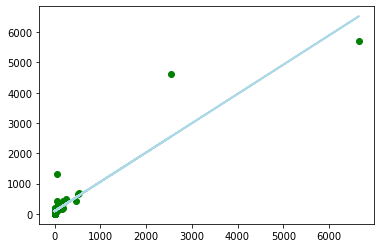

In [93]:
plt.scatter(x, y, color='green')
plt.plot(x, linreg.predict(x), color='lightblue', linewidth=2)

**the equation's R2 score**

In [94]:
print('r-squared: ', linreg.score(x, y))

r-squared:  0.8726620843043331


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [95]:
import itertools as it

from sklearn import linear_model
from copy import deepcopy
%matplotlib inline

In [96]:
df_sd = pd.read_fwf("/content/drive/MyDrive/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])


In [97]:
df_sd.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [98]:
salary_discrim = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [99]:
def lin_reg_eq_print(salary_discrim, df):
    input_cols = df[salary_discrim]
    salary = df['Salary']
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, salary)
    print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(salary_discrim, regr_sd.coef_, regr_sd.intercept_))

**the linear regression equation**

In [100]:
lin_reg_eq_print(salary_discrim, df_sd)

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


ValueError: ignored

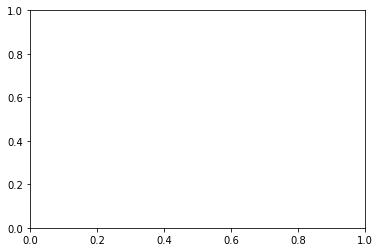

In [101]:
 plt.scatter(X['Year'],y, color='blue')
 plt.plot(X['Year'], predict, color='limegreen')
 plt.legend()

In [ ]:
def lin_reg_wrt_focus(salary_discrim, df, focus='Salary'):
    input_cols = df[salary_discrim]
    focus_output = df[focus]
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    return regr_sd.score(input_cols, focus_output)

**the selection of columns with the best  R2  score**

In [ ]:
print('R^2 score for equation using all columns: {}'
      .format(lin_reg_wrt_focus(salary_discrim, df_sd)))

** the highest R^2 score, there are two dominant factors: **Year and Rank**. Just these two factors taken together have a score of 0.84364809332645985.**

In [ ]:
def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

In [ ]:
combos = get_combos(salary_discrim)

In [ ]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_focus(list(n), df, focus)] = n
    return combo_scores

In [ ]:
combo_scores = all_combo_scores(combos, df_sd)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

**Sex on its own has a score very close to zero (0.063898925832880038)

In [ ]:
num_by_sex = df_sd.Sex.value_counts()
print('Num men: {}\nNum women: {}'.format(num_by_sex[0], num_by_sex[1]))

**check sex is a factor in salary**

In [ ]:
df_sd.pivot_table(index=df_sd.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20, title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

In [ ]:
df_sd_10 = df_sd[df_sd['Year'] <= 10]

In [ ]:
combos_10 = get_combos(salary_discrim_cols)
combo_10_scores = all_combo_scores(combos_10, df_sd_10)
sorted(combo_10_scores.items(), key=lambda c: c[0], reverse=True)

**Again, we see that Sex has no direct influence on Salary: score of 0.0068777005613497311.**

**There is no salary discrimination by Sex.**